<a href="https://colab.research.google.com/github/phuri7987/229351-StatisticalLearning/blob/main/229351_LAB03_01_640510703.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 3 กระบวนวิชา 229351 Statistical Learning for Data Science


### ในปฏิบัติการนี้เราจะฝึกการทำ PCA ด้วยสองวิธี คือ
1. หาด้วยการแยกส่วนประกอบของเมทริกซ์ผ่าน numpy
2. หาด้วยการใช้เครื่องมือที่มีมาให้ใน scikit-learn

#### ตัวอย่าง 1: แยกตัวประกอบ (spectral decomposition) ของเมทริกซ์ต่อไปนี้

$$
M=\begin{pmatrix} 3 & 4 & 6 \\ 2 & 4 & 6 \\ 7 & 8 & 3 \end{pmatrix}$$

### ความสำคัญของการ center ข้อมูลก่อนทำ PCA

![image](https://i.stack.imgur.com/9vENg.jpg)

In [1]:
import numpy as np

# เริ่มจากตัวอย่าง 3x3 เมทริกซ์

M = np.array([[3,4,6],[2,4,6],[7,8,3]])

np.mean(M, axis=0)

M = M - np.mean(M, axis=0)  # normalize the columns

# np.cov คำนวณ covariance ระหว่างเวกเตอร์แถว แต่เราต้องการ covariance ของ
# เวกเตอร์คอลัมน์ของ A จึงต้องทำการ tranpose ก่อนที่จะใส่ np.cov

A = np.cov(M, rowvar=False) # covariance matrix of M

print(M, '<- M\n\n')
print(A, '<- A')

[[-1.         -1.33333333  1.        ]
 [-2.         -1.33333333  1.        ]
 [ 3.          2.66666667 -2.        ]] <- M


[[ 7.          6.         -4.5       ]
 [ 6.          5.33333333 -4.        ]
 [-4.5        -4.          3.        ]] <- A


#### Matrix decomposition

$$A =\begin{pmatrix}\uparrow & \uparrow & \uparrow \\
u_1 & u_2 & u_3 \\
\downarrow & \downarrow & \downarrow
\end{pmatrix}\begin{pmatrix}\lambda_1 & 0 & 0 \\
0 & \lambda_2 & 0 \\
0 & 0 & \lambda_3
\end{pmatrix}\begin{pmatrix}\leftarrow & u_1 & \rightarrow \\
\leftarrow & u_2 & \rightarrow \\
\leftarrow & u_3 & \rightarrow
\end{pmatrix}$$

คำสั่งที่ใช้คือ `np.linalg.eigh` ([Documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html))

In [2]:
# หา eigenvalues และ eigenvectors ของ A ด้วยฟังก์ชันต่อไปนี้

specA = np.linalg.eigh(A)

specA

EighResult(eigenvalues=array([ 0.        ,  0.13709533, 15.196238  ]), eigenvectors=array([[ 0.        , -0.7377465 , -0.67507785],
       [ 0.6       ,  0.54006228, -0.5901972 ],
       [ 0.8       , -0.40504671,  0.4426479 ]]))

#### SpecA มีสมาชิก 2 ตัว  
ตัวที่ 1 คือ Eigenvalues  เรียงจาก**น้อยไปหามาก**  
ตัวที่สองคือ Eigenvectors โดยที่ **แต่ละ column คือ eigenvector แต่ละตัว**

\begin{align*}
\texttt{specA[0]} &=  D=[\lambda_1,\lambda_2,\lambda_3] \\
\texttt{specA[1]} &=  U=\begin{pmatrix}\uparrow & \uparrow & \uparrow \\
u_1 & u_2 & u_3 \\
\downarrow & \downarrow & \downarrow
\end{pmatrix}
\end{align*}

In [3]:
D = specA[0]
U = specA[1]

print(D)
print(U)

[ 0.          0.13709533 15.196238  ]
[[ 0.         -0.7377465  -0.67507785]
 [ 0.6         0.54006228 -0.5901972 ]
 [ 0.8        -0.40504671  0.4426479 ]]


In [4]:
# สร้าง diagonal matrix ทีมี eigenvalues ในแนวแทยง

diagD = np.diag(D)

print(diagD)

[[ 0.          0.          0.        ]
 [ 0.          0.13709533  0.        ]
 [ 0.          0.         15.196238  ]]


#### ลองเช็คว่าการแยกส่วนประกอบของ A ถูกต้องหรือไม่ดัวยสูตร

$$A =\begin{pmatrix}\uparrow & \uparrow & \uparrow \\
u_1 & u_2 & u_3 \\
\downarrow & \downarrow & \downarrow
\end{pmatrix}\begin{pmatrix}\lambda_1 & 0 & 0 \\
0 & \lambda_2 & 0 \\
0 & 0 & \lambda_3
\end{pmatrix}\begin{pmatrix}\leftarrow & u_1 & \rightarrow \\
\leftarrow & u_2 & \rightarrow \\
\leftarrow & u_3 & \rightarrow
\end{pmatrix}$$

In [5]:
print(A, ' <- A')

print(U @ diagD @ U.T,' <- U^TDU')

[[ 7.          6.         -4.5       ]
 [ 6.          5.33333333 -4.        ]
 [-4.5        -4.          3.        ]]  <- A
[[ 7.          6.         -4.5       ]
 [ 6.          5.33333333 -4.        ]
 [-4.5        -4.          3.        ]]  <- U^TDU


#### ทำ PCA จากข้อมูลที่มีอยู่ 3 มิติให้เหลือ 2 มิติ
1. เริ่มด้วยการหา Eigenvector ที่มีค่า Eigenvalue สูงสุดสองอันดับแรก

In [6]:
# D = [0, 0.137, 15.2]

l_2 = D[-1] #eigenvalue ที่มีค่าสูงที่สุด
l_3 = D[-2] #eigenvalue ที่มีค่ารองลงมา

U_23 = U[:,-2:]


print(U_23, ' <- U_2')

[[-0.7377465  -0.67507785]
 [ 0.54006228 -0.5901972 ]
 [-0.40504671  0.4426479 ]]  <- U_2


#### ให้ตัวเลขในแต่ละแถวของ $A$ ทำ projection บนเวกเตอร์ $u_1$ และ $u_2$ ทำได้โดย
$$MU_{23}=\begin{pmatrix} \longleftarrow & x & \longrightarrow \\ \longleftarrow & y & \longrightarrow \\ \longleftarrow & z & \longrightarrow \end{pmatrix}\begin{pmatrix}\uparrow & \uparrow \\
u_2 & u_3  \\
\downarrow & \downarrow
\end{pmatrix}=\begin{pmatrix}x\cdot u_2 &x\cdot u_3 \\
y\cdot u_2 &y\cdot u_3 \\
z\cdot u_2 &z\cdot u_3\end{pmatrix}$$

In [7]:
M2 = M @ U_23  # M คือ matrix ที่มีข้อมูลอยู่

# not U_23 @ M

print(M2)

[[-0.38738325  1.90465535]
 [ 0.35036324  2.5797332 ]
 [ 0.03702001 -4.48438855]]


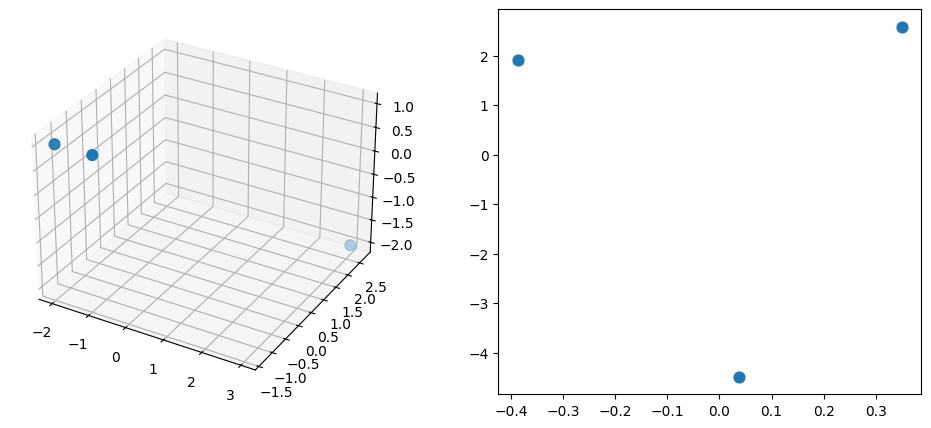

In [8]:
import matplotlib.pyplot as plt

# Plot initialization
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(M[:,0], M[:,1], M[:,2], s=60);

ax2 = fig.add_subplot(122)
ax2.scatter(M2[:,0], M2[:,1], s=60);

#### การทำ PCA ด้วย scikit-learn โดยใช้ sklearn.decomposition.PCA ([Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html))

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
B2 = pca.fit_transform(M)
print(B2)

[[-1.90465535  0.38738325]
 [-2.5797332  -0.35036324]
 [ 4.48438855 -0.03702001]]


#### ลองดูว่าทิศทางของ principal component มีอะไรบ้าง

In [10]:
print(U_23)

pca.components_

[[-0.7377465  -0.67507785]
 [ 0.54006228 -0.5901972 ]
 [-0.40504671  0.4426479 ]]


array([[ 0.67507785,  0.5901972 , -0.4426479 ],
       [ 0.7377465 , -0.54006228,  0.40504671]])

#### สามารถดูได้ว่าในแต่ละทิศได้อธิบายความแปรปรวนของข้อมูลไปเท่าไหร่

In [11]:
pca.explained_variance_

array([15.196238  ,  0.13709533])

#### หรือสามารถดูเป็นสัดส่วนได้

In [12]:
pca.explained_variance_ratio_

array([0.991059, 0.008941])